In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2023-ml-midterm-p2/train.csv
/kaggle/input/2023-ml-midterm-p2/test.csv
/kaggle/input/2023-ml-midterm-p2/submit_sample.csv


In [2]:
#랜덤시드 고정
import random
import os
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

In [3]:
#데이터 불러오기
train = pd.read_csv("/kaggle/input/2023-ml-midterm-p2/train.csv")
test = pd.read_csv("/kaggle/input/2023-ml-midterm-p2/test.csv")
submit = pd.read_csv("/kaggle/input/2023-ml-midterm-p2/submit_sample.csv")

In [4]:
#데이터 생김새 확인하기
train.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [5]:
#데이터에 필요없는 칼럼 없애주기
train.drop(['index'],axis=1,inplace=True)
test.drop(['index'],axis=1,inplace=True)

In [6]:
#결측치 및 type확인하기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    object 
 12  thal      242 non-null    object 
 13  target    242 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 26.6+ KB


In [7]:
#ca 전처리하기
#수치형인데 object여서 유일한 값들 확인
train['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [8]:
#최빈값 확인
print(sum(train['ca']=='0'))
print(sum(train['ca']=='1'))
print(sum(train['ca']=='2'))
print(sum(train['ca']=='3'))

144
53
28
16


In [9]:
#"?"는 0으로 바꿀거임
train.replace({"?":'0'},inplace=True)
test.replace({"?":'0'},inplace=True)

In [10]:
#"?"있는지 확인
print(sum(train['ca']=='?'))

0


In [11]:
#thal전처리하기
#수치형인데 object여서 유일한 값들 확인
train['thal'].unique()

array(['6', '3', '7', '0'], dtype=object)

In [12]:
#object모두 수치형으로 바꾸기
train['ca'] = train['ca'].astype("int64")
test['ca'] = test['ca'].astype("int64")
train['thal'] = train['thal'].astype("int64")
test['thal'] = test['thal'].astype("int64")

In [13]:
#확인하기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
 13  target    242 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.6 KB


In [14]:
#설명변수와 종속변수 나눠주기
x = train.drop(['target'],axis=1)
y = train['target']

In [15]:
y.unique()

array([0, 2, 1, 3, 4])

In [16]:
for i in range(len(y)):
    if y[i] == 2 or y[i] == 3 or y[i] == 4:
        y[i] = 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
y.unique()

array([0, 1])

In [18]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3


In [19]:
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,37,1,3,130,250,0,0,187,0,3.5,3,0,3
1,62,0,4,140,268,0,2,160,0,3.6,3,2,3
2,58,0,1,150,283,1,2,162,0,1.0,1,0,3
3,60,1,4,130,206,0,2,132,1,2.4,2,2,7
4,60,1,4,117,230,1,0,160,1,1.4,1,2,7


In [20]:
#scaling 해주기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_st = ss.fit_transform(x)
test_st = ss.transform(test)

In [21]:
#다항 분류 문제이니 knn이나 logistic이나 da를 서야함.
#데이터 수가 적으니 logistic먼저
#모델 학습 및 평가도 할 거임
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# model=LogisticRegression()
# model.fit(x_st,y)
# accuracy_score(y, model.predict(x_st))

# 여러 모델 해보기

In [22]:
# # #가장 좋은 성능을 내는 모델
# from sklearn.linear_model import LogisticRegression 
# from sklearn.metrics import accuracy_score
# model=LogisticRegression(max_iter= 1000)
# model.fit(x,y)
# accuracy_score(y, model.predict(x))

In [23]:
# #가장 좋은 성능을 내는 모델
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# model=KNeighborsClassifier(n_neighbors=10,weights='distance')
# model.fit(x_st,y)
# accuracy_score(y, model.predict(x_st))

In [24]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# model=LinearDiscriminantAnalysis()
# model.fit(x,y)
# accuracy_score(y, model.predict(x))

In [25]:
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.metrics import accuracy_score
# model=QuadraticDiscriminantAnalysis()
# model.fit(x,y)
# accuracy_score(y, model.predict(x))

In [26]:
from sklearn import tree
from sklearn.metrics import accuracy_score
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(x, y)
print(accuracy_score(y, model.predict(x)))

0.8677685950413223


In [27]:
model.get_depth()

3

In [28]:
model.get_n_leaves()

8

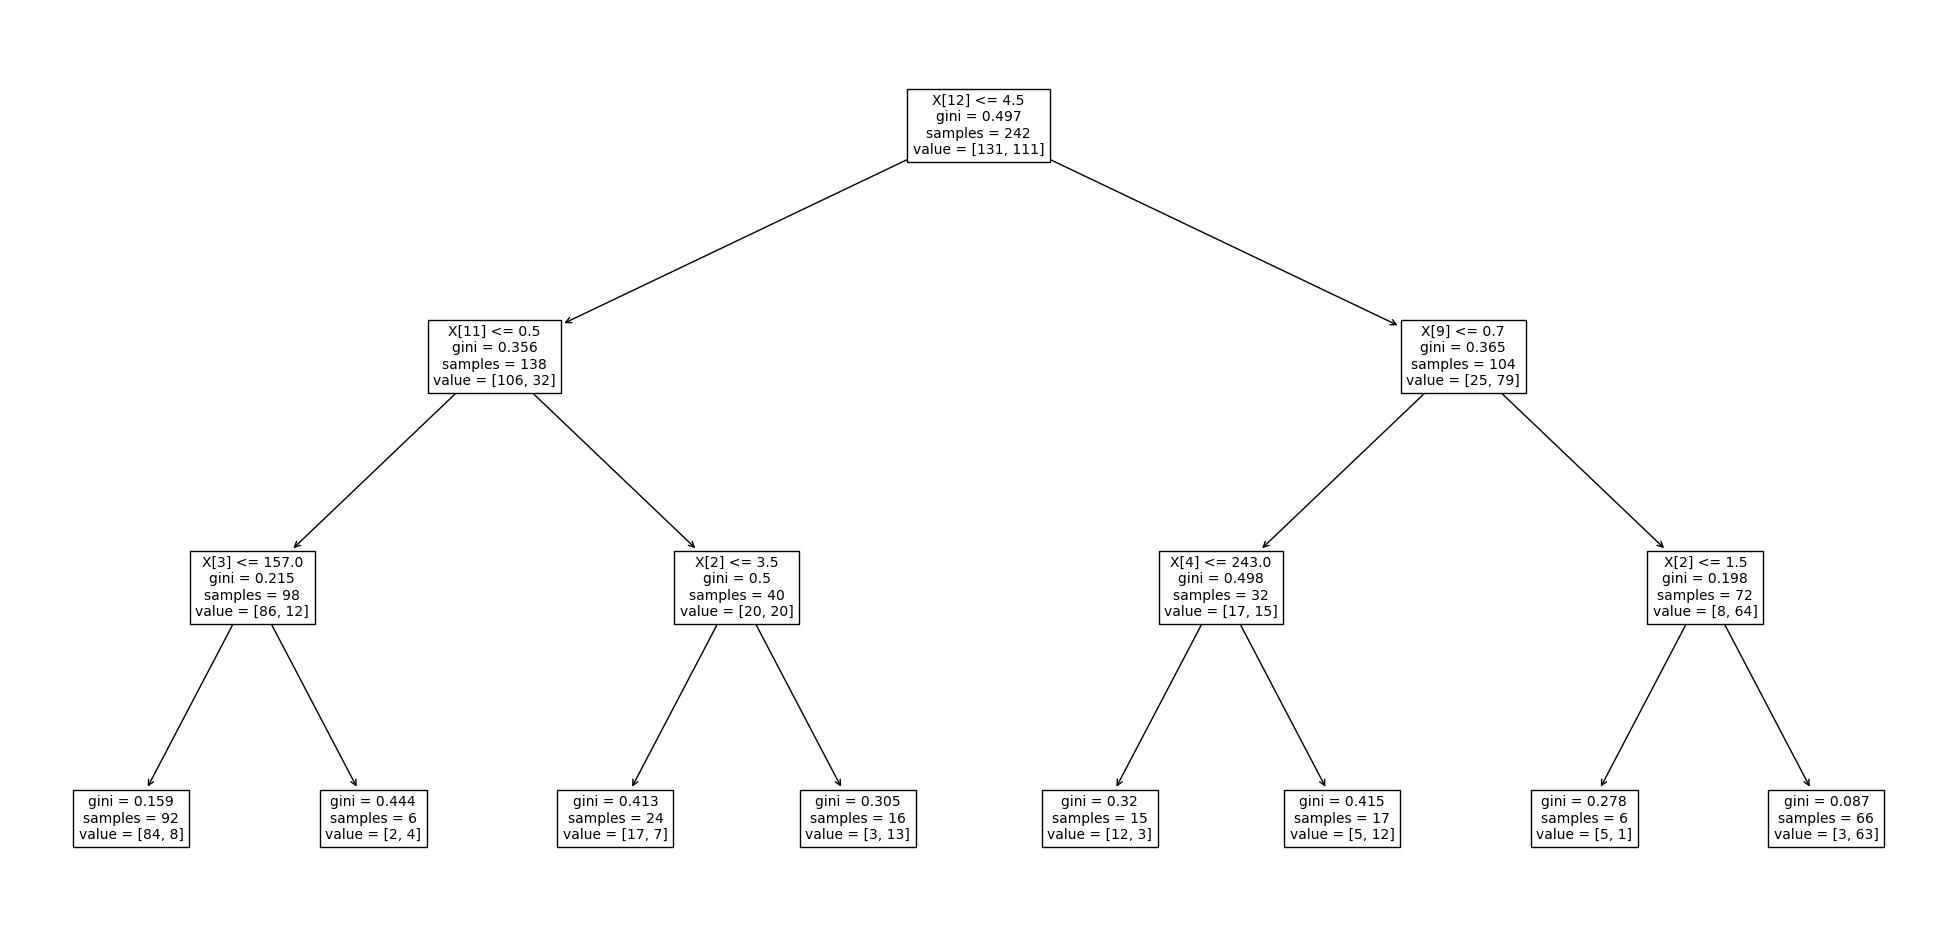

In [29]:
import matplotlib.pyplot as plt
fit, ax = plt.subplots(figsize = (25,12))
tree.plot_tree(model.fit(x,y),fontsize=10)
plt.show()

In [30]:
#submit 형태 확인
submit.head()

,index,target
0,3,NaN
1,6,NaN
2,21,NaN
3,24,NaN
4,31,NaN


In [31]:
model.predict(test)

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [32]:
# 제출
submit['target']=model.predict(test)
submit.to_csv("submit.csv",mode='w',header=True,index=False)